In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import kaepora as kpora
import kaepora_plot as kplot
import matplotlib.pyplot as plt
import copy
import numpy as np

In [3]:
example_query = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -1 and phase <= 1 and ((dm15_source < 1.8) or (dm15_from_fits < 1.8)) and si_v0 < -11000"]


In [4]:
#spec_array = kpora.grab(example_query[0], verbose=True, db_file = '/Users/christopherlee/Desktop/SIP_2021/kaepora/data/kaepora_v1_DEV.db')
spec_array = kpora.grab(example_query[0], verbose=True, db_file = '/Users/christopherlee/Desktop/SIP_2021/kaepora/data/kaepora_v1.2.db')
#copy_array = copy.deepcopy(spec_array)

64 Total Spectra found
64 spectra of SNe that have host reddening corrections
Arrays cleaned
Name Filename Source SNR Phase MJD MJD_max z Host Morphology Minwave Maxwave
1998dk sn1998dk-19980831-ui.flm bsnip 225.833313606 -0.728371655089 51056.305 0.013219 14.0 3310.0 10016.0
2002de sn2002de-20020608.374-ui-corrected.flm bsnip 12.5207317551 -0.16048772706 52433.374 0.028116 19.0 3142.0 10064.0
2002ha sn2002ha-20021102-ui-corrected.flm bsnip 116.10385589 -0.0433753943234 52580.14 0.0144 11.0 3110.0 10204.0
2002he sn2002he-20021108-br.flm bsnip 167.2628495 0.0575854705037 52586.0 0.024564 1.0 3050.0 9148.0
2005na sn2005na-20060105.335-ui.flm bsnip 40.5116724849 0.432612766749 53740.335 0.026322 10.0 3278.0 10180.0
2006ej sn2006ej-20060824.430-ui.flm bsnip 107.94997635 -0.386103412998 53971.43 0.020452 8.0 3306.0 10140.0
2007bz sn2007bz-20070426.419-ui.flm bsnip 40.7215753614 0.94932558736 54216.419 0.021778 14.0 3322.0 10226.0
2007co sn2007co-20070614.468-ui-corrected.flm bsnip 77.550841

In [5]:
copy_array = copy.deepcopy(spec_array)

In [6]:
print spec_array[0].event_data.keys()
#print spec_array[0].event_data['si_v0']

[u'e_mb_lc', u'salt2_phot_source', u'e_c_salt', u'logMst_lc', u'Foundation_vel', u'delta', u'cov_mb_s_lc', u'B_minus_V_cfa_err', u'NED_host', u'e_Bmag_salt', u'mu_mlcs31', u'glon_host', u'zCMB_mlcs31', u'Carbon_presence', u'e_av_mlcs31', u'e_logMst_lc', u'e_s_salt', u'av_mlcs17', u'RA', u'Dm15_from_fits', u'cov_s_c_lc', u'MJD_max', u'M_b_cfa_err', u'e_delta_mlcs17', u'cERR', u'Foundation_x1', u'e_c_lc', u'Av_25', u'Redshift', u'av_mlcs31', u't0', u'Bmag_salt2', u'czCMB_host', u'x1ERR', u'mtype_host', u'filt_host', u'x1_salt2', u'cz_host', u'mu_salt', u'Ebv_host', u'mb_lc', u'globalmass', u'MUMODEL', u'zCMB_mlcs17', u'DEC', u'Homogenized_Photometry', u'e_c_salt2', u'e_av_mlcs17', u'Foundation_z', u'MURES_NO_MSTEP_C', u'Foundation_c', u'delta_mlcs17', u'bias_lc', u'global_umg', u'localmass', u'e_delta_mlcs31', u'MURES_NO_MSTEP', u'e_zCMB_mlcs31', u'zCMB_salt2', u'separation', u'V_at_max', u'c', u'Bmag_salt', u't1_host', u'Foundation_mjd_max', u'MU', u'ypos_host', u'localssfr', u'glat_hos

In [7]:
spec_array_dered = kpora.host_dereddening(spec_array, verbose=False, cutoff=2.)

In [8]:
for spec in spec_array_dered:
    print spec.name, spec.filename, spec.source, spec.phase, spec.wavelength[spec.x1], spec.wavelength[spec.x2]

1998dk sn1998dk-19980831-ui.flm bsnip -0.728371655089 3310.0 10016.0
2002de sn2002de-20020608.374-ui-corrected.flm bsnip -0.16048772706 3142.0 10064.0
2002ha sn2002ha-20021102-ui-corrected.flm bsnip -0.0433753943234 3110.0 10204.0
2002he sn2002he-20021108-br.flm bsnip 0.0575854705037 3050.0 9148.0
2005na sn2005na-20060105.335-ui.flm bsnip 0.432612766749 3278.0 10180.0
2006ej sn2006ej-20060824.430-ui.flm bsnip -0.386103412998 3306.0 10140.0
2007bz sn2007bz-20070426.419-ui.flm bsnip 0.94932558736 3322.0 10226.0
2007co sn2007co-20070614.468-ui-corrected.flm bsnip 0.824762746822 3290.0 10174.0
1994d sn1994D-19940321.35-fast.flm cfa -0.235515309497 3750.0 7570.0
1994t sn1994T-19940611.21-fast.flm cfa -0.178803389723 3728.0 7418.0
1994t sn1994T-19940612.19-fast.flm cfa 0.768371323421 3728.0 7418.0
1996ab sn1996ab-19960522.37-fast.flm cfa -0.194690265481 3328.0 6596.0
1996x sn1996X-19960417.33-fast.flm cfa -0.572027270607 3728.0 7450.0
1996x sn1996X-19960418.31-fast.flm cfa 0.401213571739 372

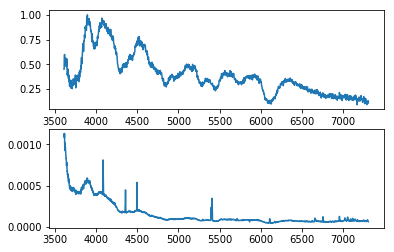

In [9]:
fig, ax = plt.subplots(2,1)
example_spec = spec_array_dered[20]
ax[0].plot(example_spec.wavelength, example_spec.flux)
ax[1].plot(example_spec.wavelength, 1/example_spec.ivar)
plt.show()

In [10]:
for spec in spec_array:
    print spec.name, spec.filename, spec.phase, spec.dm15

1998dk sn1998dk-19980831-ui.flm -0.728371655089 1.05
2002de sn2002de-20020608.374-ui-corrected.flm -0.16048772706 0.96
2002ha sn2002ha-20021102-ui-corrected.flm -0.0433753943234 1.22
2002he sn2002he-20021108-br.flm 0.0575854705037 1.44
2005na sn2005na-20060105.335-ui.flm 0.432612766749 1.09
2006ej sn2006ej-20060824.430-ui.flm -0.386103412998 1.26659174257
2007bz sn2007bz-20070426.419-ui.flm 0.94932558736 1.05
2007co sn2007co-20070614.468-ui-corrected.flm 0.824762746822 1.16
1994d sn1994D-19940321.35-fast.flm -0.235515309497 1.37
1994t sn1994T-19940611.21-fast.flm -0.178803389723 1.51
1994t sn1994T-19940612.19-fast.flm 0.768371323421 1.51
1996ab sn1996ab-19960522.37-fast.flm -0.194690265481 1.01
1996x sn1996X-19960417.33-fast.flm -0.572027270607 1.26
1996x sn1996X-19960418.31-fast.flm 0.401213571739 1.26
1997bp sn1997bp-19970409.29-fast.flm -0.878696276548 1.08
1997bp sn1997bp-19970410.27-fast.flm 0.0932251128592 1.08
1997dt sn1997dt-19971204.11-fast.flm 0.32263892832 1.04
1998dh sn1998

In [11]:
spec_attributes = dir(spec_array[0])
print len(spec_array)
for att in spec_attributes:
    print att

64
SNR
__class__
__delattr__
__dict__
__doc__
__format__
__getattribute__
__hash__
__init__
__module__
__new__
__reduce__
__reduce_ex__
__repr__
__setattr__
__sizeof__
__slotnames__
__str__
__subclasshook__
__weakref__
av_25
av_mlcs17
av_mlcs31
c_array
dm15
dm15_array
event_data
filename
flux
hr_array
interp
ivar
low_conf
maxwave
minwave
mjd
morph_array
name
other_spectral_data
phase
phase_array
red_array
ref
shape_param
source
spec_bin
up_conf
vel
wavelength
x1
x2


In [12]:
ex_query = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where" \
              " phase >= -1 and phase <= 1 and ((dm15_source between 0.5 and 1.8) or (dm15_from_fits between 0.5 and 1.8)) and si_v0"]
composites, sn_arrays, boot_sn_arrays = kpora.make_composite(ex_query, db_file = '/Users/christopherlee/Desktop/SIP_2021/kaepora/data/kaepora_v1.2.db', shape_param='dm15', boot=False, make_corr=True, av_corr=True, medmean=1, 
                                                             verbose=False, gini_balance=True, combine=True, scale_region=[4000,9000])


SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -1 and phase <= 1 and ((dm15_source between 0.5 and 1.8) or (dm15_from_fits between 0.5 and 1.8)) and si_v0
146 Total Spectra found
5 flagged spectra removed 141 spectra left
0 spectra of peculiar Ias removed 141 spectra left
139 spectra of SNe that have host reddening corrections
Arrays cleaned
139 spectra may have telluric contamination
93 total SNe
removed spectra of SNe with A_V > 2.0
Using 132 spectra of 89 SNe
Gini balancing...
Balanced after 27 iterations


1994t_combined 0.20852939906620607 1.5100000000000005 -12711.0737954
1994s_combined 0.9910554441474209 0.9399999999999998 -10834.3725037
1998dx_combined -0.7561329888839753 1.3200000000000005 -11873.6877103
1998es_combined 0.4927667231519816 0.8499999999999996 -10296.5171429
2007s_combined -0.12656590344786403 0.9399999999999997 -11164.4796693
2007a_combined 0.45000127251856775 0.9499999999999998 -10912.3151785
2005ag_combined -0.6944911897764504 1.0465189775571149 -10511.5825548
1996x_combined 0.04664545940444264 1.26 -11119.3327462
1998bp_combined -0.30736678111356225 1.7899999999999996 -10866.5559571
2001cp_combined 0.8876700055907955 0.8800000000000001 -10499.8039004
2004gs_combined -0.07873012363722845 1.4100000000000001 -10733.7373223
1999ac_combined -0.3809109504954413 1.2300000000000004 -10038.4792892
2005na_combined 0.18992936230966154 1.09 -16592.6463107
1999aa_combined 0.46254465113282 0.7799999999999999 -10299.235367
2002jy_combined 0.36240951213424194 0.8800000000000001 -1

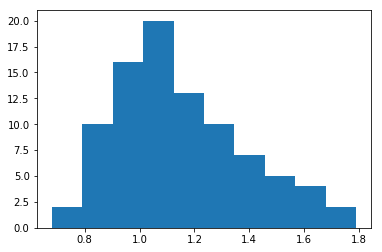

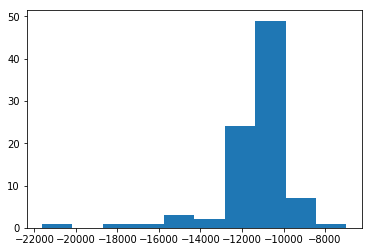

In [13]:
dm15_array = []
velocity_array = []
for spec in sn_arrays[0]:
    print spec.name, spec.phase, spec.dm15, spec.event_data['si_v0']
    dm15_array.append(spec.dm15)
    velocity_array.append(spec.event_data['si_v0'])
plt.hist(dm15_array)
plt.show()
plt.hist(velocity_array)
plt.show()

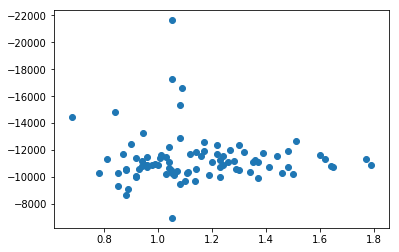

In [14]:
plt.scatter(dm15_array, velocity_array)
plt.gca().invert_yaxis()
plt.show()

In [15]:
plt.figure(figsize = [15,8])
for b in boot_sn_arrays[0]:
    plt.plot(b.wavelength, b.flux, 'g')
plt.plot(composites[0].wavelength, composites[0].flux, 'k')
plt.show()

TypeError: 'NoneType' object is not iterable

<Figure size 1080x576 with 0 Axes>

In [ ]:
kpora.set_min_num_spec(composites, 5)
kplot.comparison_plot(composites, scale_type=False, min_num_show=5)

In [ ]:
kplot.plot_comp_and_all_spectra(composites[0], sn_arrays[0],show_ivar=False, dm15=True)

In [22]:
ex_query = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where" \
              " phase >= -6 and phase <= -4 and ((dm15_source between 0.5 and 1.8) or (dm15_from_fits between 0.5 and 1.8))"]
composites, sn_arrays, og_SN_Arrays, boot_sn_arrays = kpora.make_composite(ex_query, db_file = '/Users/christopherlee/Desktop/SIP_2021/kaepora/data/kaepora_v1.2.db', shape_param='dm15', boot=False, make_corr=True, av_corr=True, medmean=1, 
                                                             verbose=False, gini_balance=True, combine=True, scale_region=[4000,9000], get_og_arr=True)


SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -6 and phase <= -4 and ((dm15_source between 0.5 and 1.8) or (dm15_from_fits between 0.5 and 1.8))
ERROR:  sn2006oa-20061122-not.dat None
ERROR:  sn2007jg-20070918-not.dat None
167 Total Spectra found
4 flagged spectra removed 163 spectra left
5 spectra of peculiar Ias removed 158 spectra left
133 spectra of SNe that have host reddening corrections
Arrays cleaned
133 spectra may have telluric contamination
75 total SNe
removed spectra of SNe with A_V > 2.0
Using 129 spectra of 72 SNe
Gini balancing...
Balanced after 20 iterations


Phase:  -5.094427357114232
dm15:  1.1156625902206807
Redshift:  0.01582468204491898
HR:  1.1368542185384298


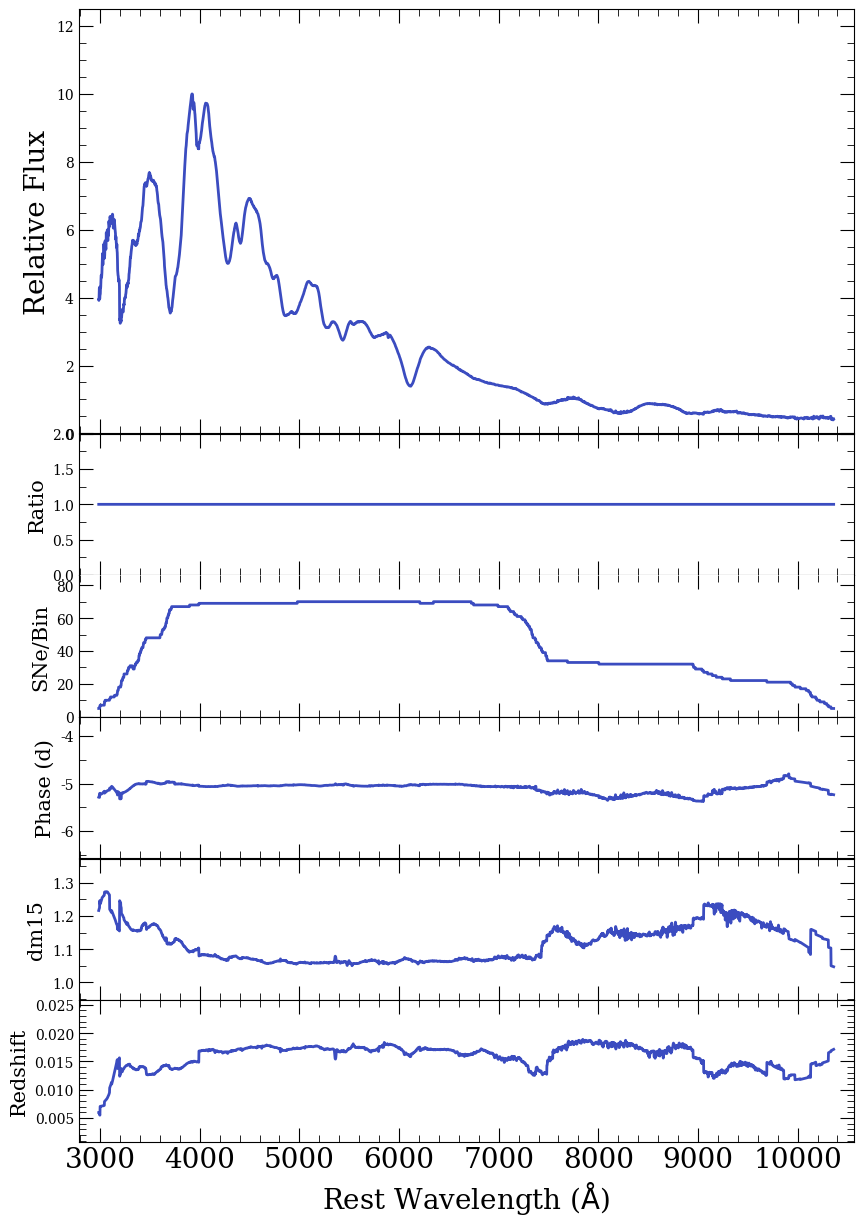

In [23]:
kpora.set_min_num_spec(composites, 5)
kplot.comparison_plot(composites, scale_type=False, min_num_show=5)

1992a


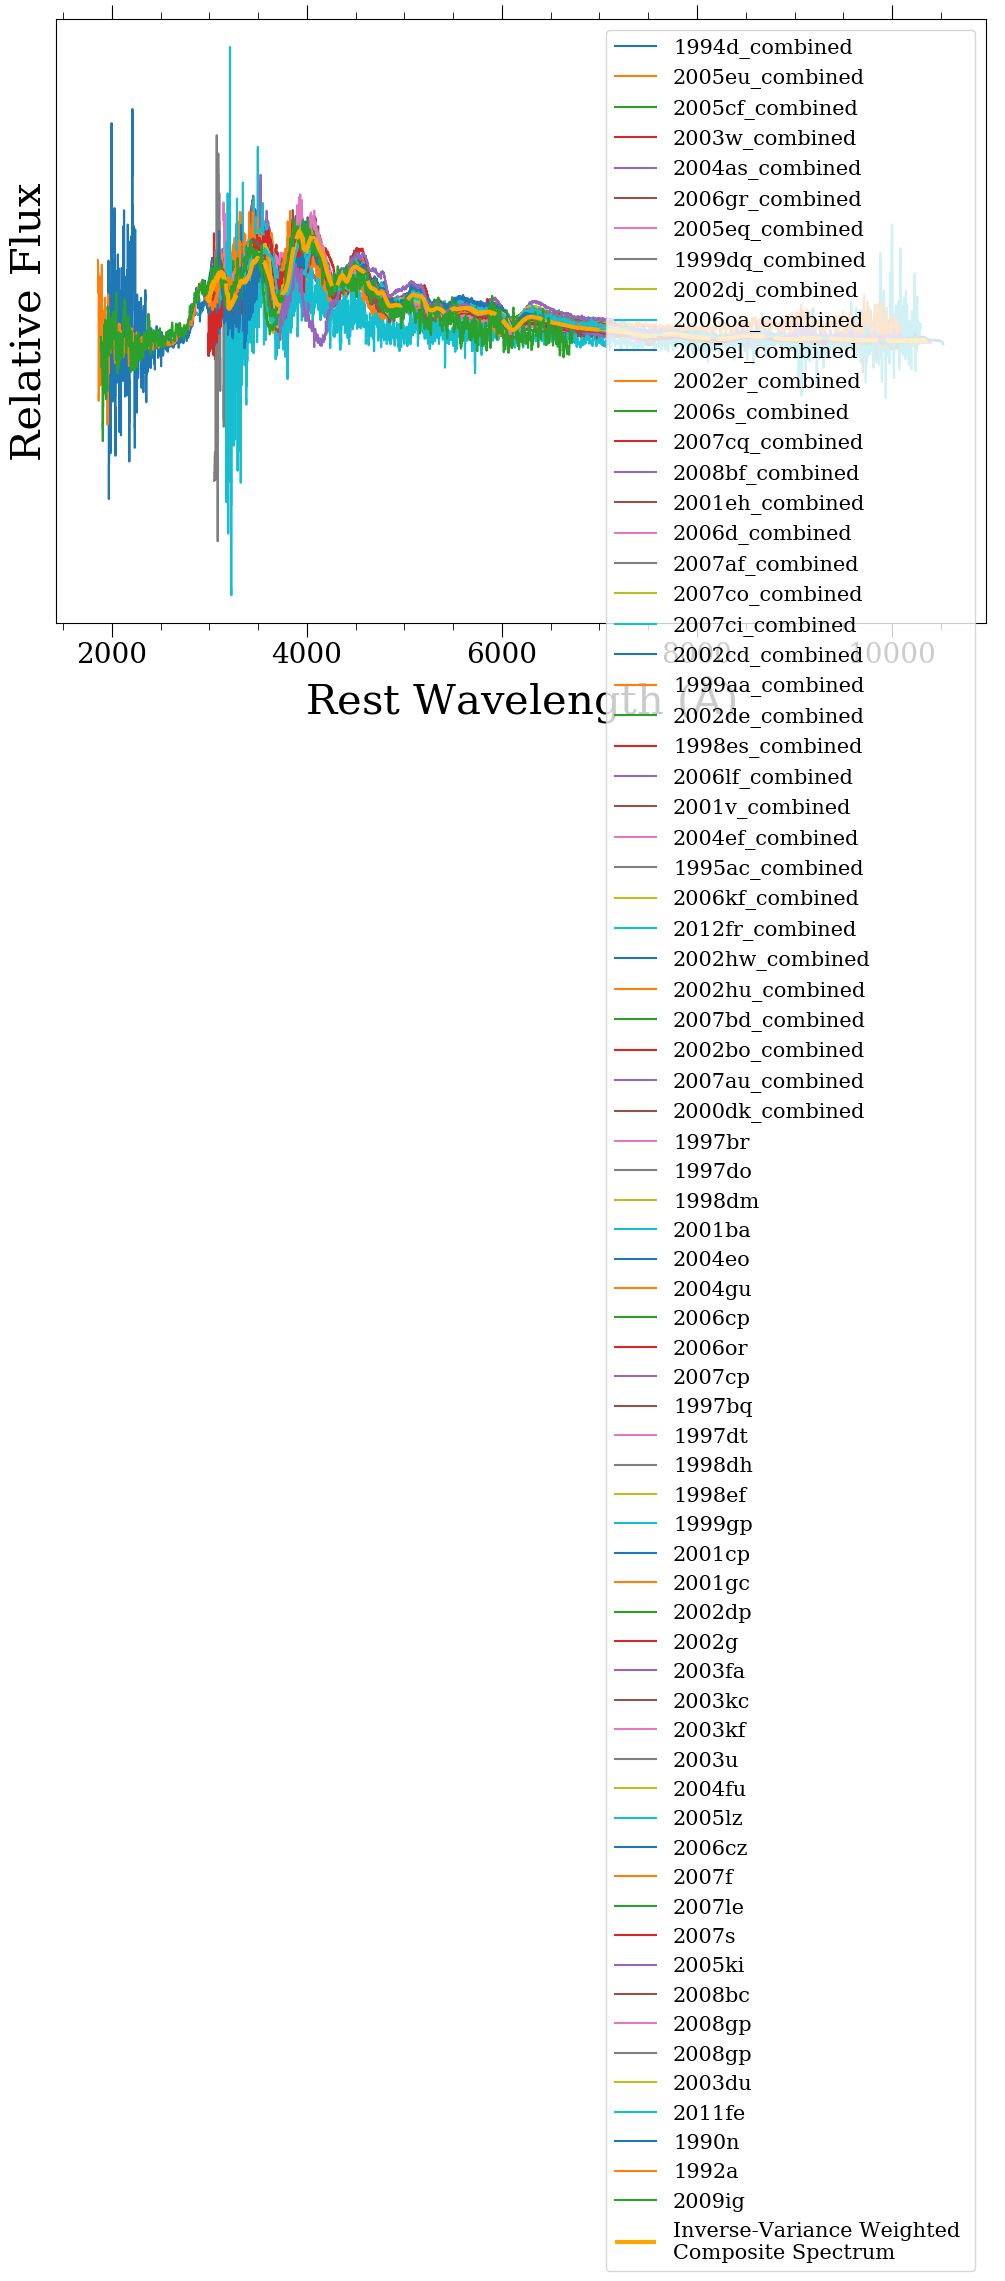

In [24]:
kplot.plot_comp_and_all_spectra(composites[0], sn_arrays[0],show_ivar=False, dm15=True)

In [4]:
ex_query = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where" \
              " phase >= -6 and phase <= -4 and ((dm15_source between 0.5 and 1.8) or (dm15_from_fits between 0.5 and 1.8))",
           "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where" \
              " phase >= -5 and phase <= -3 and ((dm15_source between 0.5 and 1.8) or (dm15_from_fits between 0.5 and 1.8))",
           "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where" \
              " phase >= -4 and phase <= -2 and ((dm15_source between 0.5 and 1.8) or (dm15_from_fits between 0.5 and 1.8))",
           "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where" \
              " phase >= -3 and phase <= -1 and ((dm15_source between 0.5 and 1.8) or (dm15_from_fits between 0.5 and 1.8))",
           "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where" \
              " phase >= -2 and phase <= 0 and ((dm15_source between 0.5 and 1.8) or (dm15_from_fits between 0.5 and 1.8))",
           "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where" \
              " phase >= -1 and phase <= 1 and ((dm15_source between 0.5 and 1.8) or (dm15_from_fits between 0.5 and 1.8))",
           "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where" \
              " phase >= 0 and phase <= 2 and ((dm15_source between 0.5 and 1.8) or (dm15_from_fits between 0.5 and 1.8))",
           "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where" \
              " phase >= 1 and phase <= 3 and ((dm15_source between 0.5 and 1.8) or (dm15_from_fits between 0.5 and 1.8))",
           "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where" \
              " phase >= 2 and phase <= 4 and ((dm15_source between 0.5 and 1.8) or (dm15_from_fits between 0.5 and 1.8))",
           "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where" \
              " phase >= 3 and phase <= 5 and ((dm15_source between 0.5 and 1.8) or (dm15_from_fits between 0.5 and 1.8))",
           "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where" \
              " phase >= 4 and phase <= 6 and ((dm15_source between 0.5 and 1.8) or (dm15_from_fits between 0.5 and 1.8))"]
composites, sn_arrays, og_SN_Arrays, boot_sn_arrays = kpora.make_composite(ex_query, db_file = '/Users/christopherlee/Desktop/SIP_2021/kaepora/data/kaepora_v1.2.db', shape_param='dm15', boot=False, make_corr=True, av_corr=True, medmean=1, 
                                                             verbose=False, gini_balance=True, combine=True, scale_region=[4000,9000], get_og_arr=True)


SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -6 and phase <= -4 and ((dm15_source between 0.5 and 1.8) or (dm15_from_fits between 0.5 and 1.8))
ERROR:  sn2006oa-20061122-not.dat None
ERROR:  sn2007jg-20070918-not.dat None
167 Total Spectra found
4 flagged spectra removed 163 spectra left
5 spectra of peculiar Ias removed 158 spectra left
133 spectra of SNe that have host reddening corrections
Arrays cleaned
133 spectra may have telluric contamination
75 total SNe
removed spectra of SNe with A_V > 2.0
Using 129 spectra of 72 SNe
Gini balancing...
Balanced after 20 iterations
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -5 and phase <= -3 and ((dm15_source between 0.5 and 1.8) or (dm15_from_fits between 0.5 and 1.8))
ERROR:  sn2006oa-20061122-not.dat None
ERROR:  sn2007jg-20070918-not.dat None
ERROR:  sn1992a-19920116.220-iue.flm None
168 Total Spectra found
4 flagged spectra removed 164 spectra

Phase:  -5.094427357114232
dm15:  1.1156625902206807
Redshift:  0.01582468204491898
HR:  1.1368542185384298
Phase:  -3.9305775740202558
dm15:  1.1054562192595752
Redshift:  0.012811715745990014
HR:  1.8586960439881057
Phase:  -2.9538353148742558
dm15:  1.1168506143766441
Redshift:  0.0141245087199055
HR:  5.237600812171595
Phase:  -1.9633006560670765
dm15:  1.202271562476729
Redshift:  0.013791350117580708
HR:  2.2649840701431057
Phase:  -0.9577514396763424
dm15:  1.1643857709904057
Redshift:  0.011638039227149009
HR:  1.0873874693287062
Phase:  0.06913949806140675
dm15:  1.1131386356738606
Redshift:  0.013100489227879335
HR:  1.5472957545444894
Phase:  0.9573397927593744
dm15:  1.1148566992651592
Redshift:  0.013920157445246993
HR:  1.7623028612081486
Phase:  1.9907010648309658
dm15:  1.1658008947936955
Redshift:  0.013016590255705784
HR:  4.538419918569123
Phase:  2.9223010900592863
dm15:  1.1639751154700215
Redshift:  0.013483449668096984
HR:  6.721018712213786
Phase:  4.01405088446

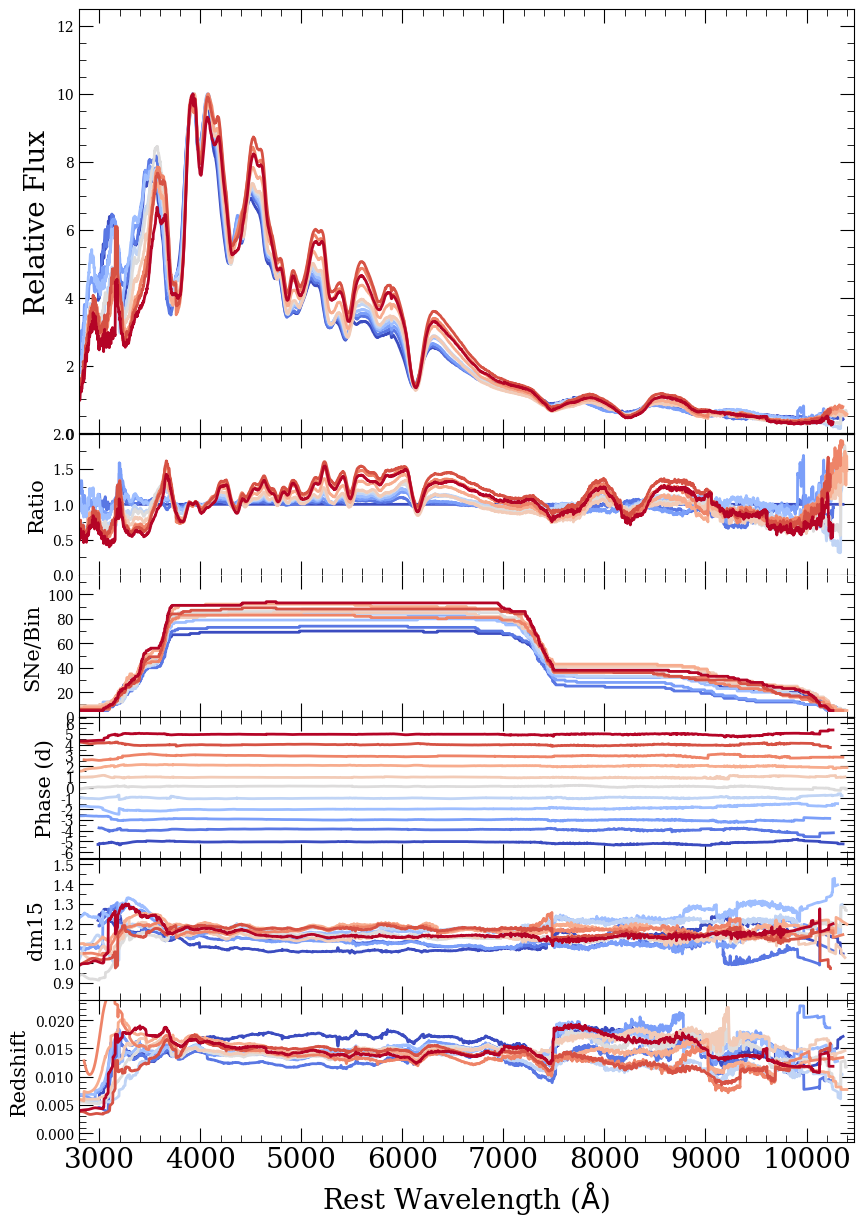

In [5]:
kpora.set_min_num_spec(composites, 5)
kplot.comparison_plot(composites, scale_type=False, min_num_show=5)

In [18]:
ex_query = ["SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where" \
              " phase >= -1 and phase <= 1 and ((dm15_source between 0.5 and 0.9) or (dm15_from_fits between 0.5 and 0.9))",
           "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where" \
              " phase >= -1 and phase <= 1 and ((dm15_source between 0.9 and 1.1) or (dm15_from_fits between 0.9 and 1.1))",
           "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where" \
              " phase >= -1 and phase <= 1 and ((dm15_source between 1.1 and 1.3) or (dm15_from_fits between 1.1 and 1.3))",
           "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where" \
              " phase >= -1 and phase <= 1 and ((dm15_source between 1.3 and 1.5) or (dm15_from_fits between 1.3 and 1.5))",
           "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where" \
              " phase >= -1 and phase <= 1 and ((dm15_source between 1.5 and 1.7) or (dm15_from_fits between 1.5 and 1.7))",
           "SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where" \
              " phase >= -1 and phase <= 1 and ((dm15_source between 1.7 and 1.9) or (dm15_from_fits between 1.7 and 1.9))"]
composites, sn_arrays, og_SN_Arrays, boot_sn_arrays = kpora.make_composite(ex_query, db_file = '/Users/christopherlee/Desktop/SIP_2021/kaepora/data/kaepora_v1.2.db', shape_param='dm15', boot=False, make_corr=True, av_corr=True, medmean=1, 
                                                             verbose=False, gini_balance=True, combine=True, scale_region=[4000,9000], get_og_arr=True)


SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -1 and phase <= 1 and ((dm15_source between 0.5 and 0.9) or (dm15_from_fits between 0.5 and 0.9))
21 Total Spectra found
2 flagged spectra removed 19 spectra left
0 spectra of peculiar Ias removed 19 spectra left
19 spectra of SNe that have host reddening corrections
Arrays cleaned
0 spectra may have telluric contamination
13 total SNe
removed spectra of SNe with A_V > 2.0
Using 19 spectra of 13 SNe
Gini balancing...
Balanced after 5 iterations
SQL Query: SELECT * from Spectra inner join Events ON Spectra.SN = Events.SN where phase >= -1 and phase <= 1 and ((dm15_source between 0.9 and 1.1) or (dm15_from_fits between 0.9 and 1.1))
62 Total Spectra found
3 flagged spectra removed 59 spectra left
2 spectra of peculiar Ias removed 57 spectra left
49 spectra of SNe that have host reddening corrections
Arrays cleaned
49 spectra may have telluric contamination
34 total SNe
removed spectra of SNe with 

Phase:  0.4136144234992684
dm15:  0.845746104946112
Redshift:  0.01919887384319749
HR:  3.6179118948491737
Phase:  0.11871208749858622
dm15:  1.0221373473852484
Redshift:  0.012524244245057638
HR:  1.5191568467711796
Phase:  0.03573048523135045
dm15:  1.1868009262405022
Redshift:  0.013014897972209232
HR:  2.227270820722872
Phase:  0.08407334898677936
dm15:  1.3919857865928873
Redshift:  0.020258539891696757
HR:  1.6451778211714492
Phase:  -0.4126136176685117
dm15:  1.5932904257606981
Redshift:  0.014813592812646199
HR:  1.068238613474261
Phase:  0.09291076571975118
dm15:  1.8329232192353426
Redshift:  0.009258438821080012
HR:  1.3269366918242846


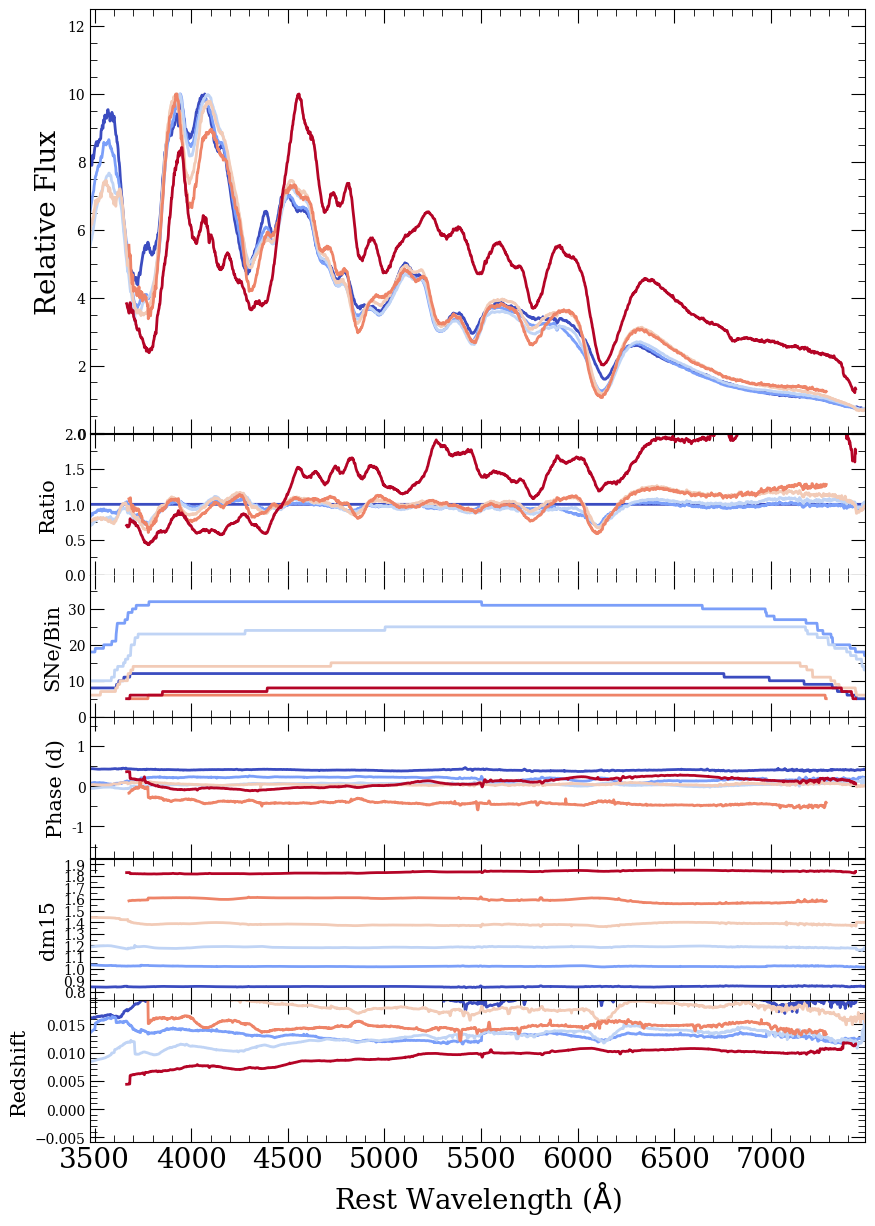

In [19]:
kpora.set_min_num_spec(composites, 5)
kplot.comparison_plot(composites, scale_type=False, min_num_show=5)